# Assignment 5 - Machine Learning in R

**Author**: Nikhil Modak
**Date**: 7/22/25
**Environment**: See 'environment.yml'
**Description**: My notebook explores elementary machine learning with caret and tidyverse. It includes data preparation, model training, and evaluation.


In [1]:
library(tidyverse)
library(caret)
library(ellipse)
library(kernlab)
library(randomForest)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift



Attaching package: ‘ellipse’


The following object is masked from ‘package:graphics’:

    pairs



Attaching package: ‘kernlab’


The following object is masked from ‘package:purrr’:

    cross


The following object is masked from ‘package:ggplot2’:

    alpha


randomForest 4.7-1.2

Type rfNews() to see new features/changes/bug fixes.


At

## Load Relevant Data

In [3]:
# attach the iris dataset to the environment
data(iris)
# rename the dataset
dataset <- iris

## Load dataset from CSV

In [4]:
# define the filename
filename <- "iris.csv"
# load the CSV file from the local directory
dataset <- read.csv(filename, header=FALSE)
# set the column names in the dataset
colnames(dataset) <- c("Sepal.Length","Sepal.Width","Petal.Length","Petal.Width","Species")

## Create a Validation Dataset

In [5]:
# create a list of 80% of the rows in the original dataset we can use for training
validation_index <- createDataPartition(dataset$Species, p=0.80, list=FALSE)
# select 20% of the data for validation
validation <- dataset[-validation_index,]
# use the remaining 80% of data to training and testing the models
dataset <- dataset[validation_index,]

## Summarize the Dataset

### Establish Dimensions of Datset

In [6]:
# dimensions of dataset
dim(dataset)

[1] 120   5

### Types of Attributes

In [7]:
# list types for each attribute
sapply(dataset, class)

Sepal.Length  Sepal.Width Petal.Length  Petal.Width      Species 
   "numeric"    "numeric"    "numeric"    "numeric"  "character"

### Peep the data

In [8]:
# take a peek at the first 5 rows of the data
head(dataset)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
7,4.6,3.4,1.4,0.3,Iris-setosa


### Establish the Levels of the Class

In [9]:
# list the levels for the class
class(dataset$Species)
dataset$Species <- as.factor(dataset$Species)
levels(dataset$Species)

[1] "character"

[1] "Iris-setosa"     "Iris-versicolor" "Iris-virginica"

### Class Distribution

In [10]:
# summarize the class distribution
percentage <- prop.table(table(dataset$Species)) * 100
cbind(freq=table(dataset$Species), percentage=percentage)

,freq,percentage
Iris-setosa,40,33.33333
Iris-versicolor,40,33.33333
Iris-virginica,40,33.33333


### Statistical Summary

In [11]:
# summarize attribute distributions
summary(dataset)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.100   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.500   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.250   Median :1.300  
 Mean   :5.858   Mean   :3.067   Mean   :3.769   Mean   :1.214  
 3rd Qu.:6.425   3rd Qu.:3.300   3rd Qu.:5.125   3rd Qu.:1.800  
 Max.   :7.700   Max.   :4.400   Max.   :6.900   Max.   :2.500  
            Species  
 Iris-setosa    :40  
 Iris-versicolor:40  
 Iris-virginica :40  
                     
                     
                     

## Visualize the Dataset

### Univariate plots

In [12]:
# split input and output
x <- dataset[,1:4]
dataset$Species <- as.factor(dataset$Species)
y <- dataset[,5]

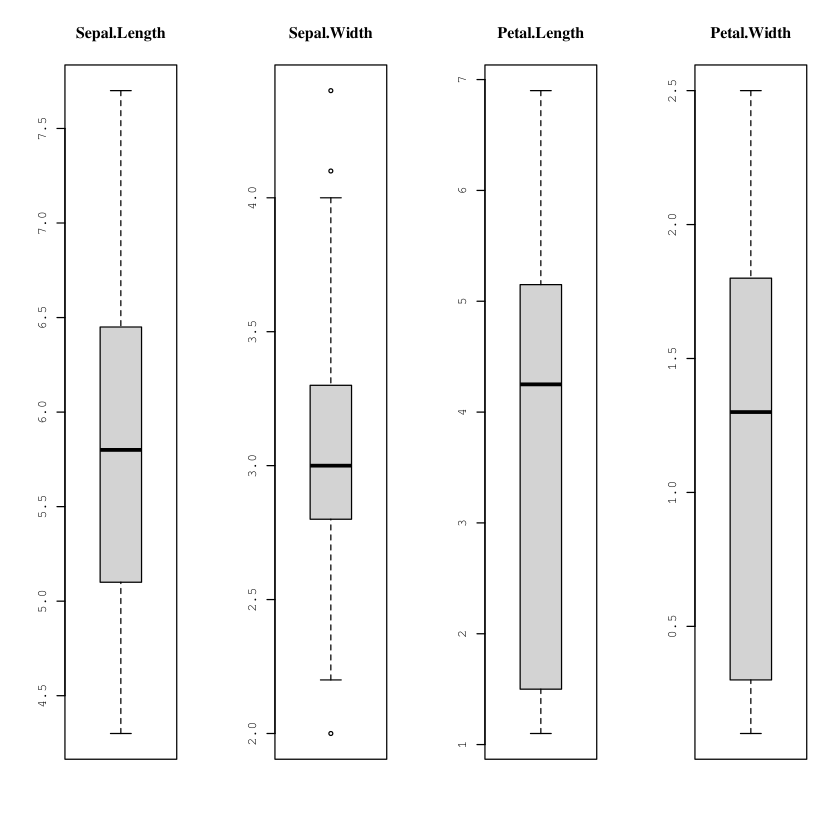

In [13]:
# boxplot for each attribute on one image
par(mfrow=c(1,4))
  for(i in 1:4) {
  boxplot(x[,i], main=names(iris)[i])
  }

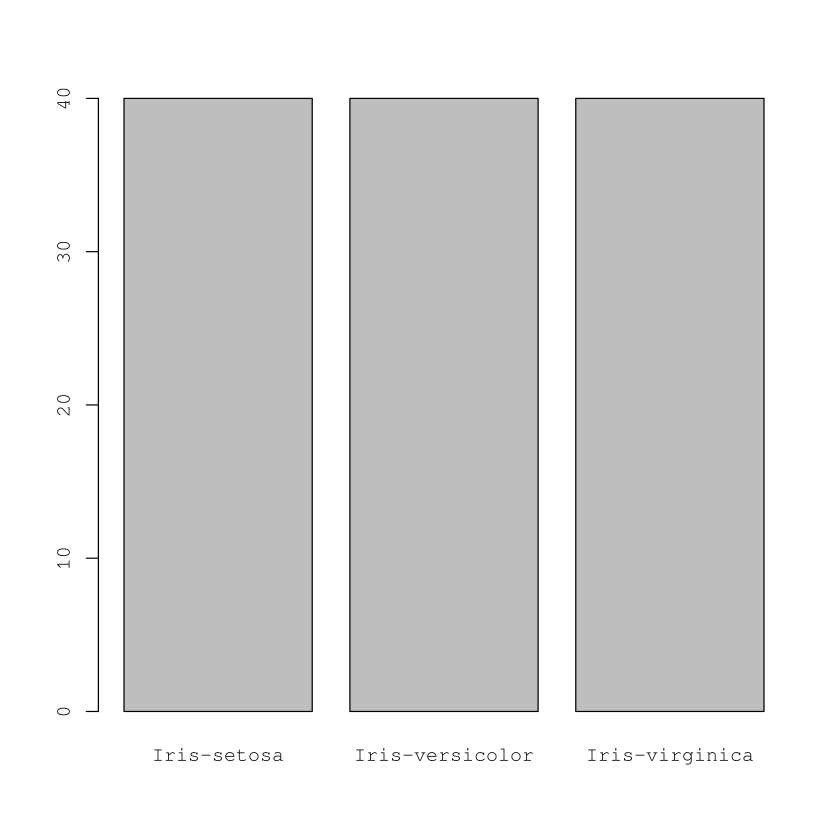

In [14]:
# barplot for class breakdown
plot(y)

### Multivariate Plots

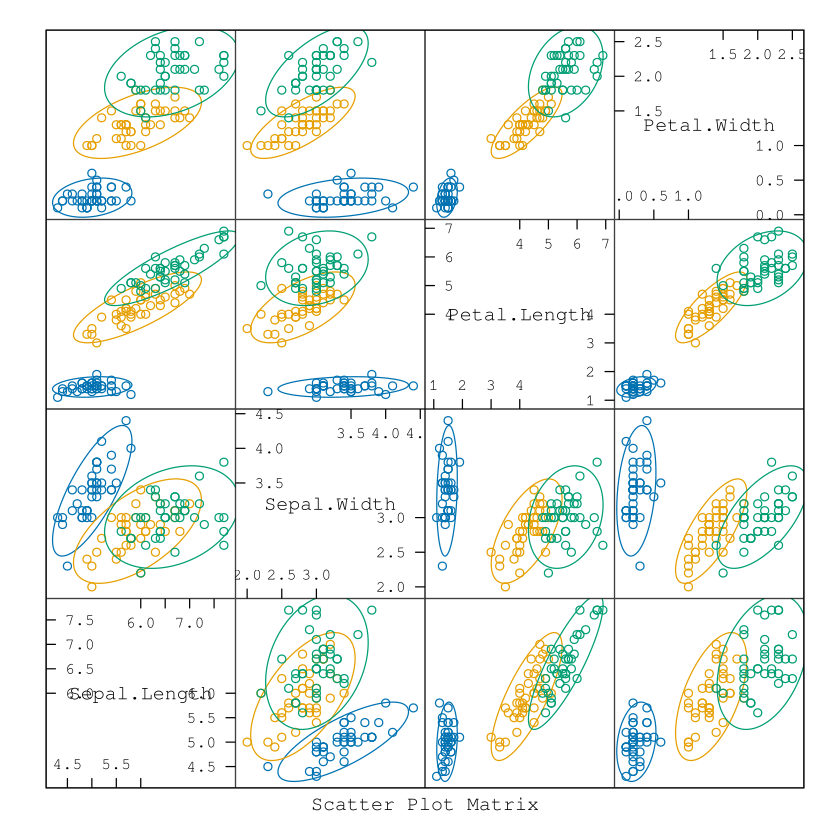

In [15]:
#scatterplot matrix
featurePlot(x=x, y=y, plot="ellipse")

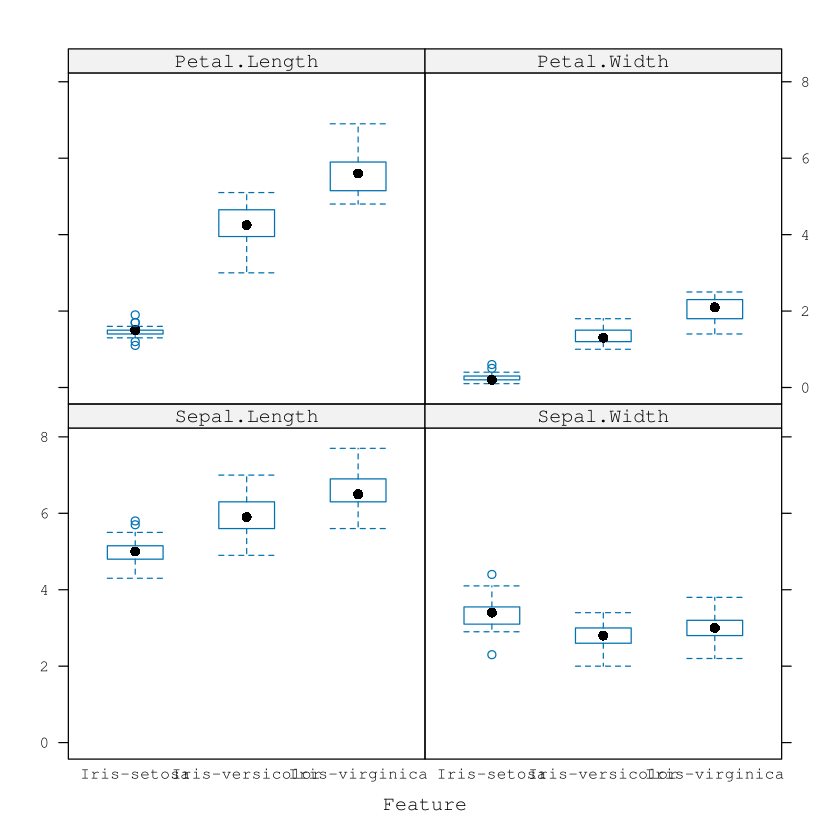

In [16]:
# box and whisker plots for each attribute
featurePlot(x=x, y=y, plot="box")

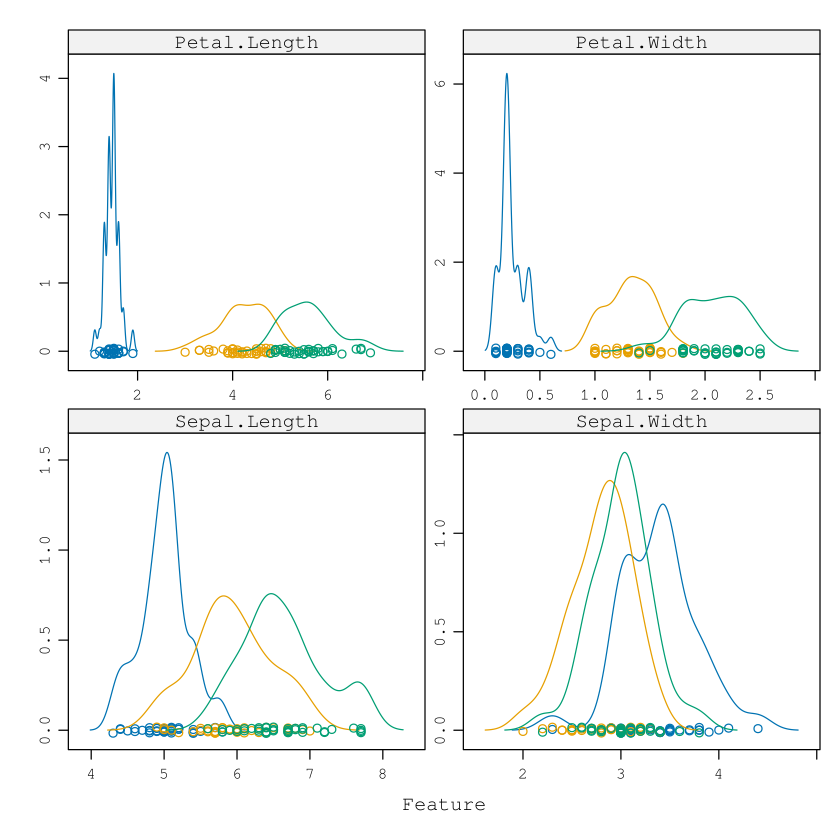

In [17]:
# density plots for each attribute by class value
scales <- list(x=list(relation="free"), y=list(relation="free"))
featurePlot(x=x, y=y, plot="density", scales=scales)

## Evaluate Some Algorithms

In [18]:
# Run algorithms using 10-fold cross validation
control <- trainControl(method="cv", number=10)
metric <- "Accuracy"

### Build Models

In [20]:
# a) linear algorithms
set.seed(7)
fit.lda <- train(Species~., data=dataset, method="lda", metric=metric, trControl=control)
# b) nonlinear algorithms
# CART
set.seed(7)
fit.cart <- train(Species~., data=dataset, method="rpart", metric=metric, trControl=control)
# kNN
set.seed(7)
fit.knn <- train(Species~., data=dataset, method="knn", metric=metric, trControl=control)
# c) advanced algorithms
# SVM
set.seed(7)
fit.svm <- train(Species~., data=dataset, method="svmRadial", metric=metric, trControl=control)
# Random Forest
set.seed(7)
fit.rf <- train(Species~., data=dataset, method="rf", metric=metric, trControl=control)

### Select the Best Model

In [21]:
# summarize accuracy of models
results <- resamples(list(lda=fit.lda, cart=fit.cart, knn=fit.knn, svm=fit.svm, rf=fit.rf))
summary(results)


Call:
summary.resamples(object = results)

Models: lda, cart, knn, svm, rf 
Number of resamples: 10 

Accuracy 
          Min.   1st Qu. Median      Mean 3rd Qu. Max. NA's
lda  0.9166667 1.0000000      1 0.9833333       1    1    0
cart 0.8333333 1.0000000      1 0.9750000       1    1    0
knn  0.9166667 1.0000000      1 0.9916667       1    1    0
svm  0.8333333 0.8750000      1 0.9500000       1    1    0
rf   0.8333333 0.9166667      1 0.9583333       1    1    0

Kappa 
      Min. 1st Qu. Median   Mean 3rd Qu. Max. NA's
lda  0.875  1.0000      1 0.9750       1    1    0
cart 0.750  1.0000      1 0.9625       1    1    0
knn  0.875  1.0000      1 0.9875       1    1    0
svm  0.750  0.8125      1 0.9250       1    1    0
rf   0.750  0.8750      1 0.9375       1    1    0


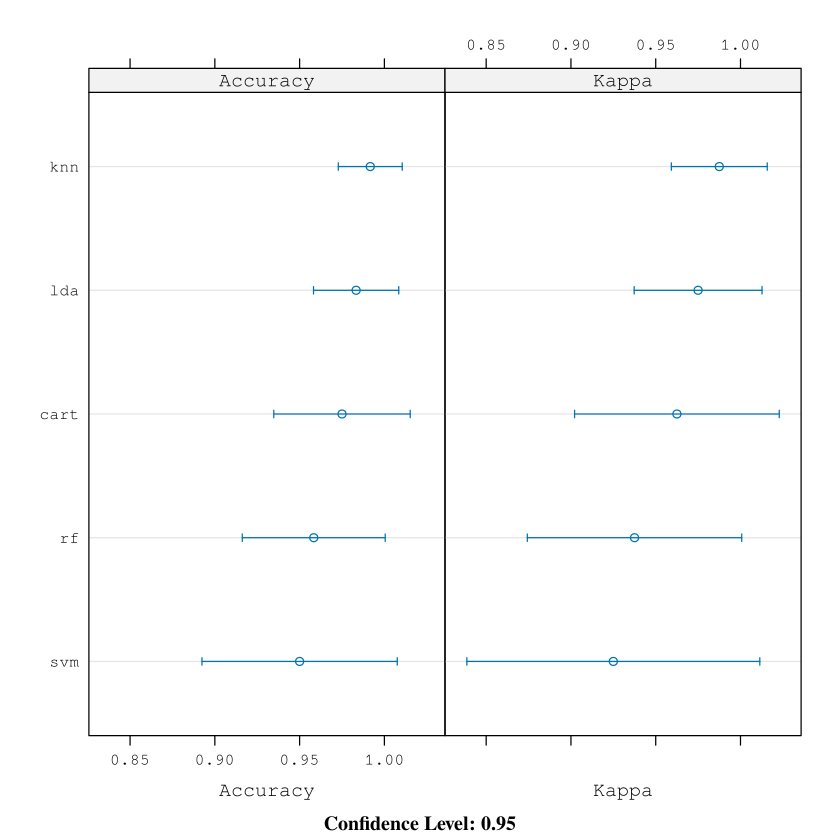

In [22]:
# compare accuracy of models
dotplot(results)

In [23]:
# summarize Best Model
print(fit.lda)

Linear Discriminant Analysis 

120 samples
  4 predictor
  3 classes: 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 108, 108, 108, 108, 108, 108, ... 
Resampling results:

  Accuracy   Kappa
  0.9833333  0.975



## Make Predictions

In [25]:
# estimate skill of LDA on the validation dataset
validation$Species <- factor(validation$Species)
predictions <- predict(fit.lda, validation)
confusionMatrix(predictions, validation$Species)

Confusion Matrix and Statistics

                 Reference
Prediction        Iris-setosa Iris-versicolor Iris-virginica
  Iris-setosa              10               0              0
  Iris-versicolor           0              10              1
  Iris-virginica            0               0              9

Overall Statistics
                                          
               Accuracy : 0.9667          
                 95% CI : (0.8278, 0.9992)
    No Information Rate : 0.3333          
    P-Value [Acc > NIR] : 2.963e-13       
                                          
                  Kappa : 0.95            
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: Iris-setosa Class: Iris-versicolor
Sensitivity                      1.0000                 1.0000
Specificity                      1.0000                 0.9500
Pos Pred Value                   1.0000                 0.9091
Neg Pred Value